### Install library

In [4]:
import cv2
import sys
import os
from facenet_pytorch import MTCNN
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch

### Rename images

In [2]:
file_path = '/home/jovyan/cs470-deep-face-classifier/full_data/new_updated/'

dog : 2912 ['박보영', '손예진', '아이유', '송중기', '임시완', '엑소 백현', '워너원 강다니엘', '태연', '박보검', '한효주']
cat : 3081 ['김희선', '유인영', '엑소 시우민', '워너원 황민현', '이종석', '이나영', '이준기', '강동원', '한예슬', '한채영']
bear : 2118 ['마동석', '.ipynb_checkpoints', '박성웅', '곽도원', '정형돈', '조진웅', '안재홍', '조세호', '스윙스', '김구라', '최자']
dinosaur : 2629 ['공유', '.ipynb_checkpoints', '김아중', '김우빈', '송지효', '신민아', '육성재', '윤두준', '이민기', '천우희', '한지민']
bald : 3592 ['Bald_test', '.ipynb_checkpoints', 'Bald_train']
rabbit : 3323 ['방탄소년단 정국', '.ipynb_checkpoints', '엑소 수호', '백진희', '아이콘 바비', '트와이스 다현', '워너원 박지훈', '안형섭', '수지', '이세영', '트와이스 나연']
{'dog': 2912, 'cat': 3081, 'bear': 2118, 'dinosaur': 2629, 'bald': 3592, 'rabbit': 3323}


<BarContainer object of 6 artists>

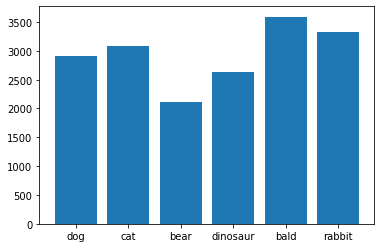

In [15]:
a ={}
for i in ['dog','cat', 'bear', 'dinosaur', 'bald', 'rabbit']:
    file_path_i = file_path + i
    filenames_i = os.listdir(file_path_i)
    m = 0
    for j in filenames_i:
        filenames_j = os.listdir(file_path_i + '/'+j)
        m += len(filenames_j)
    a[i] = m
    print(i, ':', m, filenames_i)
print(a)
keys = a.keys()
values = a.values()

plt.bar(keys, values)

dog : 1957 ['박보영', '손예진', '아이유', '송중기', '임시완', '엑소 백현', '워너원 강다니엘', '태연', '박보검', '한효주']
dog : 957
cat : 2194 ['김희선', '유인영', '엑소 시우민', '워너원 황민현', '이종석', '이나영', '이준기', '강동원', '한예슬', '한채영']
cat : 889
bear : 1521 ['마동석', '.ipynb_checkpoints', '박성웅', '곽도원', '정형돈', '조진웅', '안재홍', '조세호', '스윙스', '김구라', '최자']
bear : 598
dinosaur : 1758 ['공유', '.ipynb_checkpoints', '김아중', '김우빈', '송지효', '신민아', '육성재', '윤두준', '이민기', '천우희', '한지민']
dinosaur : 873
bald : 2592 ['Bald_test', '.ipynb_checkpoints', 'Bald_train']
bald : 1001
rabbit : 2275 ['방탄소년단 정국', '.ipynb_checkpoints', '엑소 수호', '백진희', '아이콘 바비', '트와이스 다현', '워너원 박지훈', '안형섭', '수지', '이세영', '트와이스 나연']
rabbit : 1051
{'dog': 1957, 'cat': 2194, 'bear': 1521, 'dinosaur': 1758, 'bald': 2592, 'rabbit': 2275}
{'dog': 957, 'cat': 889, 'bear': 598, 'dinosaur': 873, 'bald': 1001, 'rabbit': 1051}
<class 'dict_values'>
dict_values([957, 889, 598, 873, 1001, 1051])


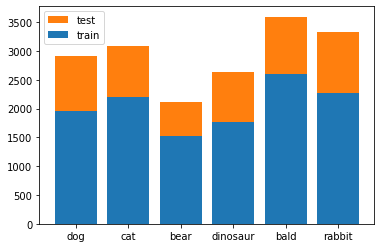

In [23]:
split = {
    'train' : {
        'bald' : ['Bald_train'],
        'bear' : ['곽도원', '김구라', '마동석', '박성웅','스윙스','안재홍','정형돈'],
        'cat' : ['강동원','김희선','엑소 시우민','유인영','워너원 황민현','이종석','이나영'],
        'dinosaur' : ['공유','김아중','김우빈','송지효','신민아','육성재','윤두준'],
        'dog' : ['박보검','박보영','손예진','송중기','아이유','한효주','임시완'],
        'rabbit' : ['방탄소년단 정국','백진희','수지','아이콘 바비','안형섭','이세영','트와이스 나연']
    },
    'test' : {
        'bald' : ['Bald_test'],
        'bear' : ['조세호', '조진웅', '최자'],
        'cat' : ['이준기','한예슬','한채영'],
        'dinosaur' : ['이민기','천우희','한지민'],
        'dog' : ['엑소 백현','워너원 강다니엘','태연'],
        'rabbit' : ['엑소 수호','워너원 박지훈','트와이스 다현']
    },
}

train_num ={}
test_num = {}
for i in ['dog','cat', 'bear', 'dinosaur', 'bald', 'rabbit']:
    file_path_i = file_path + i
    filenames_i = os.listdir(file_path_i)
    train = 0
    test = 0
    for j in filenames_i:
        filenames_j = os.listdir(file_path_i + '/'+j)
        if j in split['train'][i]:
            train += len(filenames_j)
        else:
            test += len(filenames_j)
    train_num[i] = train
    test_num[i] = test
    print(i, ':', train, filenames_i)
    print(i, ':', test)
print(train_num)
print(test_num)
keys = train_num.keys()
values = train_num.values()

keys_test = test_num.keys()
values_test = test_num.values()
print(type(values_test))
print(values_test)
p1 = plt.bar(keys, values)
p2 = plt.bar(keys_test, values_test, bottom=list(values))
plt.legend((p2[0],p1[0]), ('test', 'train'))


### Face detect

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mtcnn = MTCNN(keep_all=True, device=device)
margin = 0.1
for i in ['dog','cat', 'bear', 'dinosaur', 'rabbit', 'bald']:
    file_path_i = file_path + i
    filenames_i = os.listdir(file_path_i)
    try:
        os.mkdir('/home/jovyan/cs470-deep-face-classifier/full_data/new_updated/'+i)
    except Exception as e:
        print(e)
    for j in filenames_i:
        file_path_j = file_path_i + '/'+j
        files = os.listdir(file_path_j)
        try:
            os.mkdir('/home/jovyan/cs470-deep-face-classifier/full_data/new_updated/'+i+'/'+j)
        except:
            continue
        m=1
        for k in files:
            src = file_path_j + '/' + k
            try:
                img = Image.open(src)
                boxes, _ = mtcnn.detect(img)
                if len(boxes) != 1:
                    continue
            except:
                continue
            
            x1, y1, x2, y2 = boxes[0]
            im = np.array(img)
            convert  = im[int(y1*(1-3*margin)):int(y2*(1+margin)),int(x1*(1-margin)):int(x2*(1+margin))]
            dst = '/home/jovyan/cs470-deep-face-classifier/full_data/new_updated/'+i+'/'+j+'/'+str(m)+'.jpg'
            try:
                gr_im= Image.fromarray(convert).save(dst)
            except:
                continue
            m += 1


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 20 bytes but only got 12. Skipping tag 36868
  " Skipping tag %s" % (size, len(data), tag)


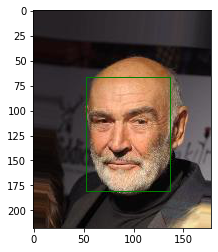

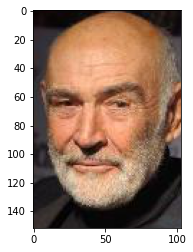

In [22]:
margin = 0.1

path = '/home/jovyan/cs470-deep-face-classifier/full_data/raw/bald/Bald/1061.jpg'
img = Image.open(path)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

mtcnn = MTCNN(keep_all=True, device=device)

boxes, _ = mtcnn.detect(img)


plt.imshow(img)

ax = plt.gca()

x1, y1, x2, y2 = boxes[0]

rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, color='green')

ax.add_patch(rect)

plt.show()

im = np.array(img)
convert  = im[int(y1*(1-3*margin)):int(y2*(1+margin)),int(x1*(1-margin)):int(x2*(1+margin))]
plt.imshow(convert)
gr_im= Image.fromarray(convert).save('/home/jovyan/cs470-deep-face-classifier/new_data/updated/dog/1.jpg')